<a href="https://colab.research.google.com/github/keng-oh/colab/blob/master/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主成分分析

In [0]:
# 必要なライブラリを読み込み
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 不要な警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

# irisデータのロード
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# データに含まれている特徴量を確認
feature_names = iris.feature_names

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
# Xを確認(１０個)

X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

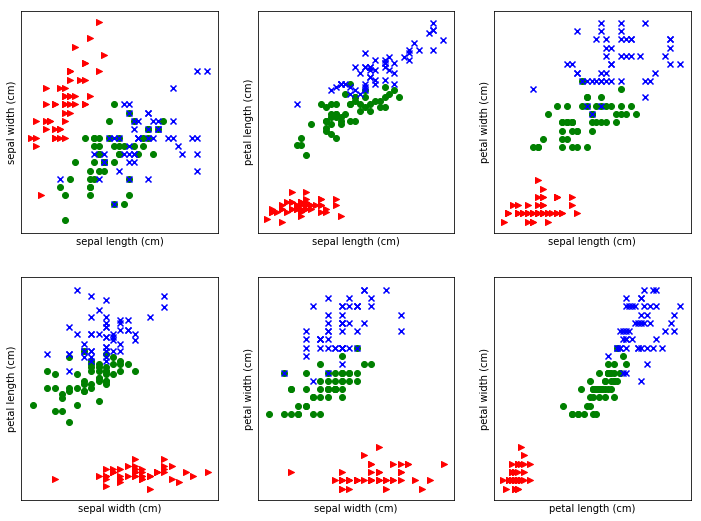

In [0]:
# 特徴選択による可視化
# 4つの特徴量のうち､2つを選んで2次元にする
import matplotlib.pyplot as plt

# 4つの特徴量の組み合わせを定義（合計6通り）
# 0: sepal length
# 1: sepal width
# 2: petal length
# 3: petal width
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# 各組み合わせに対して散布図を表示
# グラフのサイズを指定
plt.figure(figsize=(12, 9))

# グラフを特徴量のpairごとに表示
# クラスラベルごとに色を分けてプロット
# 赤: setosa 
# 青: versicolor
# 緑: verginica
for i, (p0, p1) in enumerate(pairs):
    plt.subplot(2, 3, i + 1)
    # クラスラベルごとに色分けしてプロット
    for target, marker, color in zip(list(range(3)), ">ox", "rgb"):
        plt.scatter(X[iris.target == target, p0], X[iris.target == target, p1], marker=marker, c=color)
    plt.xlabel(feature_names[p0])
    plt.ylabel(feature_names[p1])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [0]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 与えられた行列の各特徴量について､平均と標準偏差を算出
scaler.fit(X)
# Xを標準化した行列を生成
X_std = scaler.fit_transform(X)

# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 主成分を4つまで取得
X_pca = pca.fit_transform(X_std)

# 抽出した特徴量の値を出力(１０個)
X_pca[:10]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705],
       [-2.29938422, -0.59739451,  0.09129011,  0.06595556],
       [-2.38984217,  0.64683538,  0.0157382 ,  0.03592281],
       [-2.07563095,  1.48917752,  0.02696829, -0.00660818],
       [-2.44402884,  0.0476442 ,  0.3354704 ,  0.03677556],
       [-2.23284716,  0.22314807, -0.0886955 ,  0.0246121 ],
       [-2.33464048, -1.11532768,  0.14507686,  0.02685922],
       [-2.18432817, -0.46901356, -0.25376557,  0.03989929]])

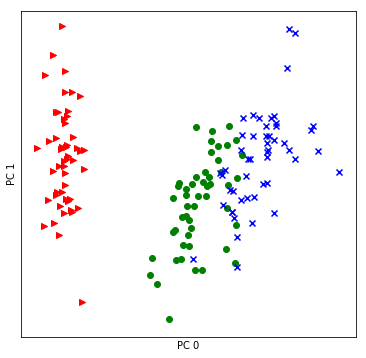

In [0]:
# 特徴抽出による可視化
# PC0とPC1について散布図を表示
plt.figure(figsize=(6, 6))
for target, marker, color in zip(range(3), '>ox', 'rgb'):
    plt.scatter(X_pca[iris.target==target, 0], X_pca[iris.target==target, 1], marker=marker, color=color)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
# 寄与率を出力
# 各主成分の寄与率がarrayの形式で入っている
# [第一主成分の寄与率 第二主成分の寄与率 ...]
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


In [0]:
# 累積寄与率を出力
# np.cumsum()で固有値の累積をとる
# [第1主成分までの累積寄与率 第2主成分までの累積寄与率 ...]
print(np.cumsum(pca.explained_variance_ratio_))

[0.72962445 0.95813207 0.99482129 1.        ]


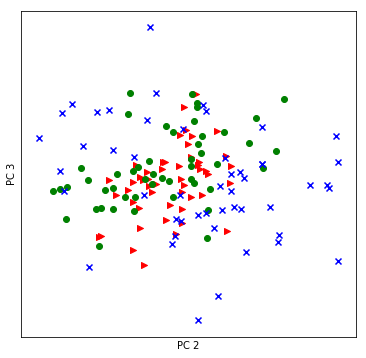

In [0]:
# 特徴抽出による可視化
# PC3とPC4について散布図を表示
plt.figure(figsize=(6, 6))
for target, marker, color in zip(range(3), '>ox', 'rgb'):
    plt.scatter(X_pca[iris.target==target, 2], X_pca[iris.target==target, 3], marker=marker, color=color)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
# 主成分の係数h_jを出力
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [0]:
# 固有値lのルートを取る
np.sqrt(pca.explained_variance_)

array([1.71408432, 0.95925226, 0.38437198, 0.14440866])

In [0]:
# 因子負荷量を出力
# ['sepal length', 'sepal width', 'petal length', 'petal width']
pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[ 0.89315091, -0.46168423,  0.99487699,  0.96821173],
       [ 0.3620387 ,  0.88567345,  0.02349363,  0.06421425],
       [-0.27658115,  0.09393351,  0.05462939,  0.24379667],
       [-0.037732  ,  0.01783586,  0.11573621, -0.07561196]])

In [0]:
# PCA前のデータを確認
# 標準化をしたとこまでのデータを利用
X_std[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [0]:
# 特徴量選択のために､特徴量を確認
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
# 特徴選択(１０個)
X_std[:, 0:2][:10]

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729]])

In [0]:
# SVMで分類
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores_1 = cross_val_score(SVC(), X_std[:, [0,2]], y, cv=5)
scores_1.mean()

0.9400000000000001

In [0]:
# PCA後のデータを確認(１０個)

X_pca[:10]

array([[-2.26470281,  0.4800266 , -0.12770602, -0.0241682 ],
       [-2.08096115, -0.67413356, -0.23460885, -0.10300677],
       [-2.36422905, -0.34190802,  0.04420148, -0.02837705],
       [-2.29938422, -0.59739451,  0.09129011,  0.06595556],
       [-2.38984217,  0.64683538,  0.0157382 ,  0.03592281],
       [-2.07563095,  1.48917752,  0.02696829, -0.00660818],
       [-2.44402884,  0.0476442 ,  0.3354704 ,  0.03677556],
       [-2.23284716,  0.22314807, -0.0886955 ,  0.0246121 ],
       [-2.33464048, -1.11532768,  0.14507686,  0.02685922],
       [-2.18432817, -0.46901356, -0.25376557,  0.03989929]])

In [0]:
# 第2主成分までを選択(１０個)

X_pca[:, 0:2][:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

In [0]:
# SVMで分類
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores_2 = cross_val_score(SVC(), X_pca[:, [0,2]], y, cv=5)
scores_2.mean()

0.96

In [0]:
# 両者の精度を比較
print('特徴選択: {}'.format(scores_1.mean()))
print('特徴抽出: {}'.format(scores_2.mean()))

特徴選択: 0.9400000000000001
特徴抽出: 0.96
